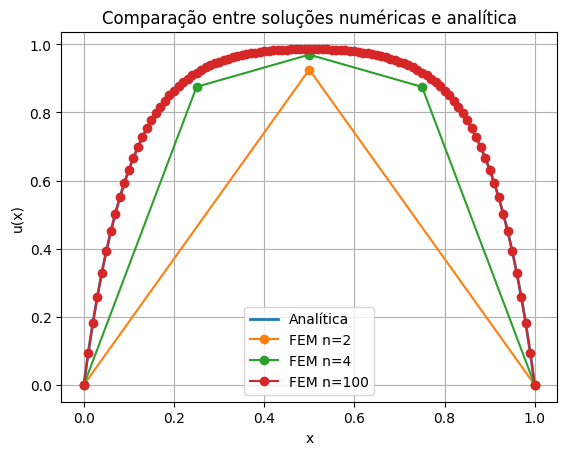

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def assemble_matrix(n, alpha, gamma):
    h = 1 / n
    A = np.zeros((n+1, n+1))
    for i in range(1, n):
        A[i, i-1] = -alpha / h
        A[i, i] = 2*alpha / h + gamma * h
        A[i, i+1] = -alpha / h
    A[0, 0] = 1
    A[n, n] = 1
    return A

def assemble_vector(n):
    h = 1 / n
    f = np.zeros(n+1)
    for i in range(1, n):
        f[i] = h
    return f

def solve_fem(n, alpha, gamma):
    A = assemble_matrix(n, alpha, gamma)
    f = assemble_vector(n)
    f[0] = 0
    f[n] = 0
    u = np.linalg.solve(A, f)
    return u

def analytical_solution(x, alpha, gamma):
    c1 = (1 - np.cosh(np.sqrt(gamma/alpha)))/(np.sinh(np.sqrt(gamma/alpha)))
    c2 = 1
    return -1*(c1 * np.sinh(np.sqrt(gamma/alpha) * x) + c2 * np.cosh(np.sqrt(gamma/alpha) * x) - 1)

alpha = 1e-2
gamma = 1
elements = [2, 4, 100]

x_values = np.linspace(0, 1, 1000)
analytical = analytical_solution(x_values, alpha, gamma)

plt.plot(x_values, analytical, label='Analítica', linewidth=2)

for n in elements:
    u = solve_fem(n, alpha, gamma)
    x = np.linspace(0, 1, n+1)
    plt.plot(x, u, label=f'FEM n={n}', marker='o')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Comparação entre soluções numéricas e analítica')
plt.grid(True)
plt.show()
